In [137]:
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
import warnings
warnings.filterwarnings('ignore')

In [155]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [139]:
file = open('znedoleni.txt', 'r')

alphabet = 'абвгдеєжзиіїйклмнопрстуфхцчшщьюя'
m = len(alphabet)

text = ''
for line in file:
    text += line
text = text.replace('ґ', 'г')
clean_text = re.sub(f'[^{alphabet}]', '', text.lower())

L_text = len(clean_text)
alph = list(alphabet)

letter_freqs = [clean_text.count(i)/L_text for i in alph]

In [158]:
lfreqs = pd.DataFrame(np.matrix(letter_freqs), columns = alph, index = [''])
lfreqs

,а,б,в,г,д,е,є,ж,з,и,і,ї,й,к,л,м,н,о,п,р,с,т,у,ф,х,ц,ч,ш,щ,ь,ю,я
,0.086764,0.018251,0.064734,0.017011,0.034884,0.045286,0.003891,0.011436,0.023471,0.063283,0.056441,0.00509,0.014818,0.034193,0.039558,0.030295,0.063544,0.093344,0.029534,0.043509,0.040347,0.047118,0.038087,0.001868,0.009745,0.007204,0.013959,0.009096,0.00496,0.015683,0.008644,0.023953


In [140]:
def count_enters(text, bigram):
    count, start = 0, 0
    while start < len(text):
        pos = text.find(bigram, start)
        if pos != -1:
            start = pos + 1
            count += 1
        else:
            break
    return count

In [141]:
bigrams = [f'{i}{j}' for i in alph for j in alph]
bigram_freqs = [count_enters(clean_text, i)/(L_text - 1) for i in bigrams]
letter_freqs_threshold = sorted(letter_freqs, reverse = True)[math.ceil(m*0.2)]
letter_freqs_threshold2 = sorted(letter_freqs)[math.ceil(m*0.2)]

bigram_freqs_s, bigrams_s = zip(*sorted(zip(bigram_freqs, bigrams)))

Afrqs = ([alph[letter_freqs.index(i)] for i in letter_freqs if i > letter_freqs_threshold], bigrams_s[-math.ceil(m*m*0.1):])
Bprhs = ([alph[letter_freqs.index(i)] for i in letter_freqs if i < letter_freqs_threshold2], bigrams_s[:math.ceil(m*m*0.1)])

In [159]:
bifreqs = pd.DataFrame(np.array(bigram_freqs).reshape((m, m)),  columns = alph, index = alph)
bifreqs

,а,б,в,г,д,е,є,ж,з,и,і,ї,й,к,л,м,н,о,п,р,с,т,у,ф,х,ц,ч,ш,щ,ь,ю,я
а,0.000411,0.002233,0.011751,1.781404e-03,4.514581e-03,0.000055,1.225185e-03,1.343570e-03,0.003644,0.000000,0.000547,2.226755e-04,2.362991e-03,3.649248e-03,8.636427e-03,4.360494e-03,0.009469,0.000630,0.003882,0.006301,0.005596,0.005944,0.000327,2.442854e-04,1.776706e-03,0.000630,0.001993,0.000875,0.000563,0.000000,0.001080,0.000715
б,0.002819,0.000022,0.000122,2.348898e-05,5.073619e-05,0.001691,5.731311e-05,1.127471e-05,0.000068,0.001799,0.002029,1.221427e-05,2.254942e-05,1.061702e-04,1.235520e-03,9.489547e-05,0.000402,0.001937,0.000100,0.001397,0.000101,0.000132,0.003775,9.395591e-07,4.228016e-05,0.000024,0.000013,0.000054,0.000006,0.000000,0.000061,0.000042
в,0.008633,0.000767,0.001060,6.623892e-04,1.537119e-03,0.003296,4.979663e-05,9.311031e-04,0.000937,0.006991,0.012151,2.828073e-04,3.401204e-04,1.083312e-03,9.339217e-04,7.507077e-04,0.002586,0.006835,0.001703,0.000931,0.004360,0.001375,0.002707,8.831856e-05,2.461645e-04,0.000363,0.000943,0.000867,0.000347,0.000000,0.000045,0.000932
г,0.002236,0.000042,0.000113,3.758236e-06,2.536810e-05,0.000276,3.758236e-06,9.395591e-06,0.000039,0.000546,0.000454,3.758236e-06,7.516473e-06,8.268120e-05,1.442223e-03,2.067030e-05,0.000560,0.008717,0.000066,0.001047,0.000048,0.000085,0.001078,3.758236e-06,2.818677e-06,0.000012,0.000006,0.000030,0.000008,0.000000,0.000029,0.000012
д,0.003272,0.000328,0.001691,1.287196e-04,3.523347e-04,0.002077,5.637355e-06,4.406532e-04,0.000316,0.004427,0.003356,4.040104e-05,4.134060e-05,7.666802e-04,8.869438e-04,2.424062e-04,0.002842,0.005851,0.000705,0.001205,0.000660,0.000323,0.002395,4.697796e-06,1.089889e-04,0.000394,0.000441,0.000079,0.000028,0.000795,0.000072,0.000609
е,0.000179,0.001988,0.003253,5.938014e-04,1.932673e-03,0.000005,2.912633e-05,8.409054e-04,0.002645,0.000000,0.000210,4.096478e-04,1.185724e-03,9.893557e-04,1.704360e-03,2.157228e-03,0.006473,0.000538,0.002425,0.007870,0.002733,0.002995,0.000155,2.226755e-04,3.711258e-04,0.000673,0.001028,0.000526,0.000433,0.000000,0.000274,0.000446
є,0.000037,0.000065,0.000263,3.100545e-05,1.832140e-04,0.000004,9.395591e-07,4.040104e-05,0.000137,0.000000,0.000068,2.837468e-04,4.228016e-05,8.174164e-05,5.637355e-05,4.641422e-04,0.000258,0.000050,0.000363,0.000059,0.000179,0.000677,0.000030,1.785162e-05,2.067030e-05,0.000025,0.000048,0.000134,0.000046,0.000000,0.000166,0.000058
ж,0.003383,0.000102,0.000146,1.973074e-05,3.288457e-04,0.002153,3.758236e-06,2.724721e-05,0.000054,0.001123,0.000617,1.221427e-05,1.127471e-05,4.509884e-04,1.691206e-04,6.576914e-05,0.001080,0.000699,0.000089,0.000033,0.000072,0.000116,0.000461,9.395591e-07,8.456032e-06,0.000037,0.000117,0.000005,0.000006,0.000000,0.000004,0.000043
з,0.006805,0.000583,0.001788,5.966200e-04,1.247734e-03,0.001188,1.503295e-05,7.798341e-05,0.000126,0.000380,0.000821,3.946148e-05,4.228016e-05,6.050761e-04,6.135321e-04,6.858781e-04,0.002645,0.000707,0.000812,0.000622,0.000237,0.000369,0.001032,3.100545e-05,6.389002e-05,0.000090,0.000149,0.000061,0.000006,0.000438,0.000019,0.000577
и,0.000379,0.001227,0.008401,1.271223e-03,2.130920e-03,0.000020,8.362076e-05,7.234605e-04,0.001966,0.000000,0.000483,3.457577e-04,5.217372e-03,3.302550e-03,3.600390e-03,4.396197e-03,0.006436,0.000539,0.002590,0.001615,0.005435,0.005162,0.000345,1.343570e-04,2.245546e-03,0.001508,0.001268,0.000941,0.000763,0.000000,0.000037,0.000716


In [163]:
with pd.ExcelWriter('freqs.xlsx') as freqs: 
    lfreqs.to_excel(freqs, sheet_name = 'Letter freqs')
    bifreqs.to_excel(freqs, sheet_name = 'Bigram freqs')

In [142]:
def gen_texts():
    texts = []
    for i in range(N):
        start = random.randint(0, L_text - L - 1)
        texts.append(clean_text[start : start + L])
    return texts

In [143]:
def uniform_text():
    Zm = alph if l == 1 else bigrams
    length = L//l
    return random.choices(Zm, k = length)

In [151]:
def gen_Vigenere_key():
    r = random.choice([1, 5, 10])
    return random.choices(range(m), k = r)

def  Vigenere(text):
    text_ = [alph.index(t) for t in text]
    cipher_text = [(t + key[text_.index(t)%len(key)])%m for t in text_]
    cipher_text = ''.join([alph[c] for c in cipher_text])
    #return [cipher_text[i:i + l] for i in range(L - l + 1)] uncomment for 1st plots
    return cipher_text

In [145]:
key = gen_Vigenere_key()

______________L = 10______________


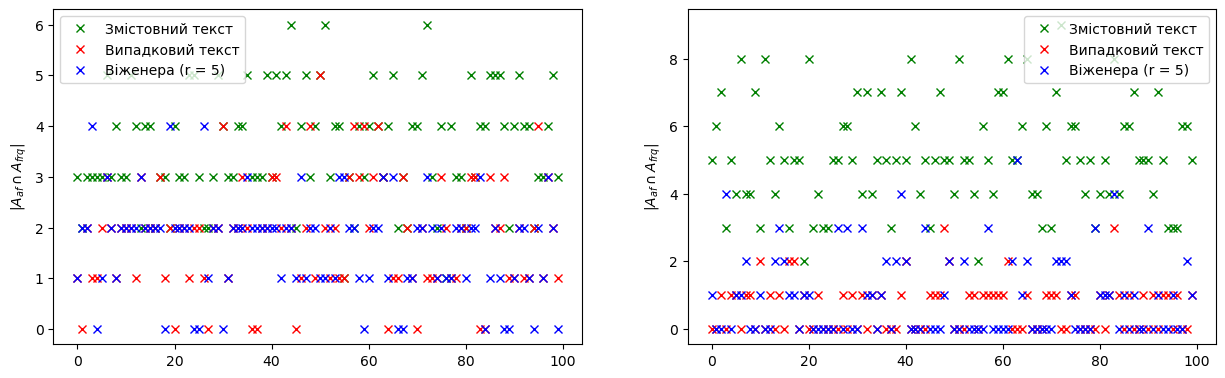

______________L = 100______________


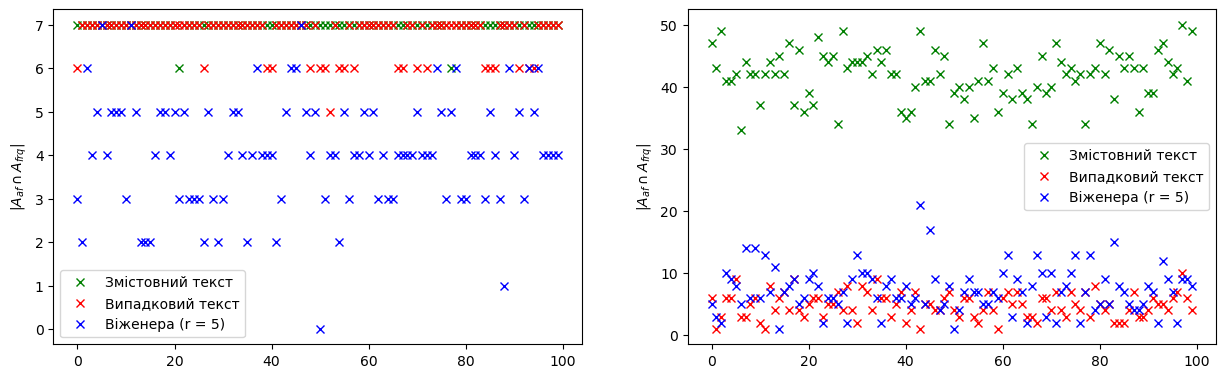

______________L = 1000______________


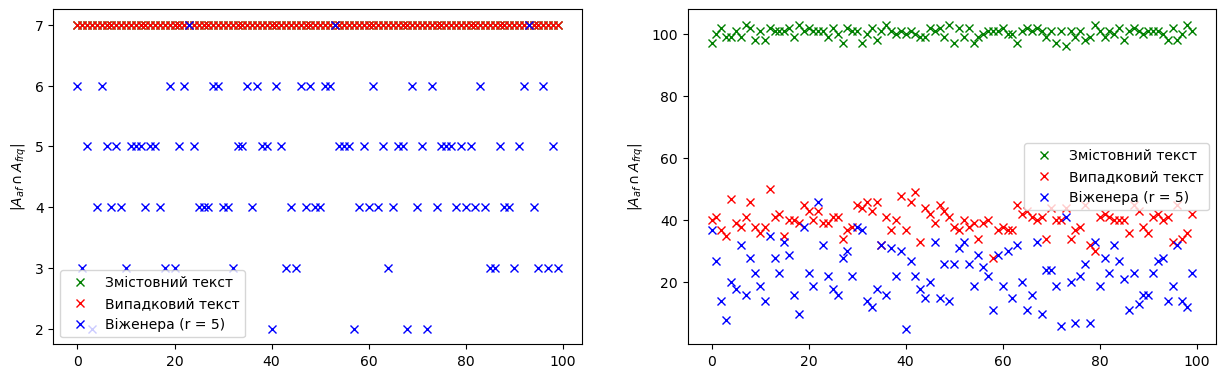

______________L = 10000______________


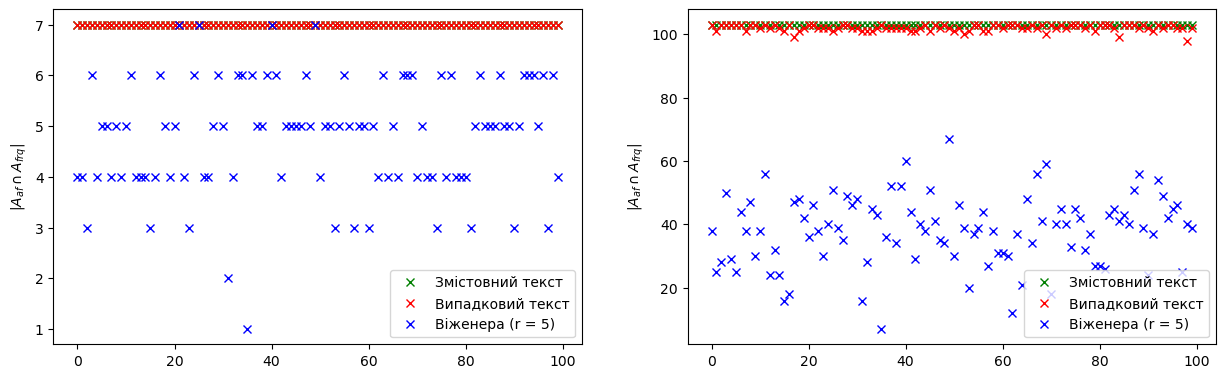

In [147]:
N = 100
i = 1
for L in (10, 100, 1000, 10000):
    print(f'______________L = {L}______________')
    texts = gen_texts()
    l = 1
    plt.subplots(figsize = (15,20))
    plt.subplot(4,2, i)
    plt.plot(range(N), [len(list(set(Afrqs[0])&set([t[i:i + 1] for i in range(L)]))) for t in texts], 'bx', color = 'green', 
                         label = 'Змістовний текст')
    plt.plot(range(N), [len(list(set(Afrqs[0])&set(uniform_text()))) for n in range(N)], 'bx', color = 'red', 
                         label = 'Випадковий текст')
    plt.plot(range(N), [len(list(set(Afrqs[0])&set(Vigenere(t)))) for t in texts], 'bx', color = 'blue', 
                         label = f'Віженера (r = {len(key)})')
    plt.ylabel('$|A_{af} \cap A_{frq}|$')
    plt.legend()
    plt.subplot(4,2, i + 1)
    l = 2
    plt.plot(range(N), [len(list(set(Afrqs[1])&set([t[i:i + 2] for i in range(L - 1)]))) for t in texts], 'bx', color = 'green',
                          label = 'Змістовний текст')
    plt.plot(range(N), [len(list(set(Afrqs[1])&set(uniform_text()))) for n in range(N)], 'bx', color = 'red',  
                          label = 'Випадковий текст')
    plt.plot(range(N), [len(list(set(Afrqs[1])&set(Vigenere(t)))) for t in texts], 'bx', color = 'blue', 
                          label = f'Віженера (r = {len(key)})')
    plt.ylabel('$|A_{af} \cap A_{frq}|$')
    plt.legend()
    plt.show()
    i += 2

In [148]:
def culc_index(Zm, text):
    ind = 0
    for i in Zm:
        c = count_enters(text, i)
        ind += c*(c - 1)
    return ind/(len(text)*(len(text) - 1))

In [149]:
letter_index =  culc_index(alph, clean_text)
bi_index =  culc_index(bigrams, clean_text)

______________L = 10______________


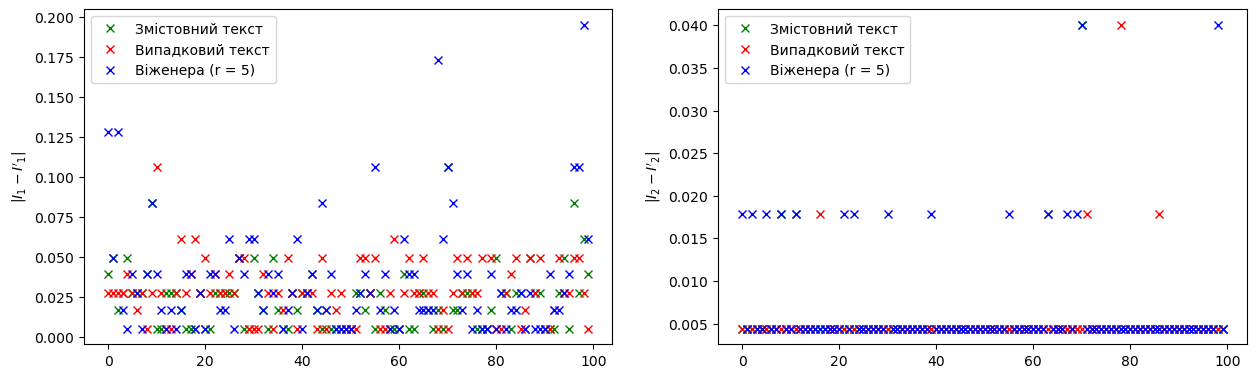

______________L = 100______________


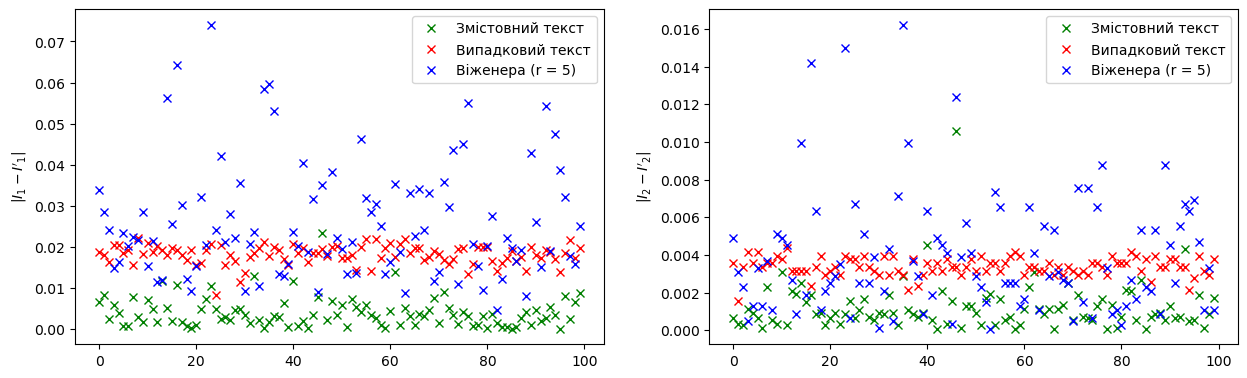

______________L = 1000______________


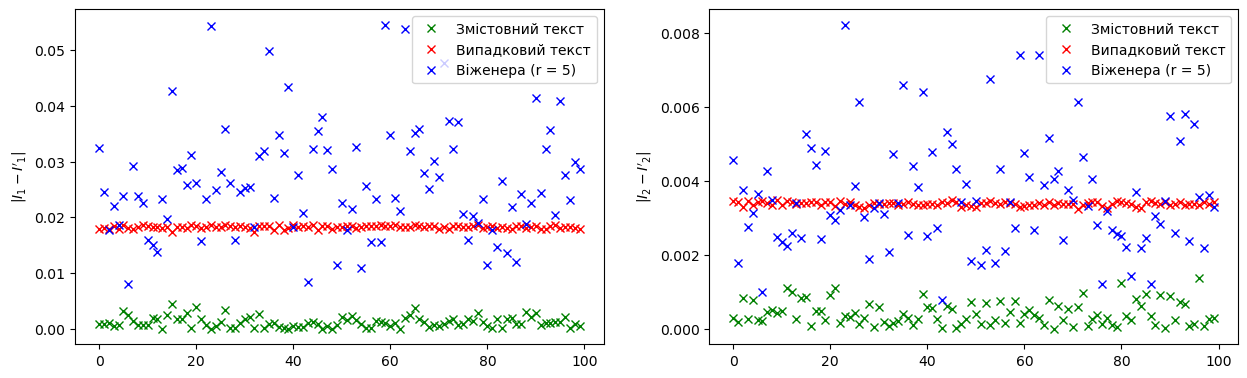

______________L = 10000______________


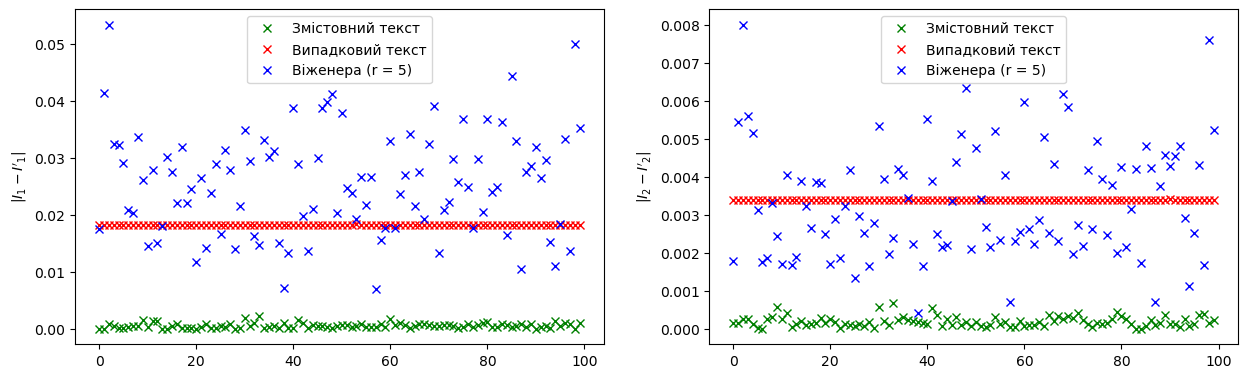

In [152]:
N = 100
i = 1
for L in (10, 100, 1000, 10000):
    print(f'______________L = {L}______________')
    texts = gen_texts()
    l = 1
    plt.subplots(figsize = (15,20))
    plt.subplot(4,2, i)
    plt.plot(range(N), [abs(culc_index(alph, t) - letter_index) for t in texts], 'bx', color = 'green', 
                         label = 'Змістовний текст')
    plt.plot(range(N), [abs(culc_index(alph, ''.join(uniform_text())) - letter_index)  for n in range(N)], 'bx', color = 'red', 
                         label = 'Випадковий текст')
    plt.plot(range(N), [abs(culc_index(alph, Vigenere(t)) - letter_index) for t in texts],'bx', color = 'blue', 
                         label = f'Віженера (r = {len(key)})')
    plt.ylabel("$|I_1 - I'_1|$")
    plt.legend()
    plt.subplot(4,2, i + 1)
    l = 2
    plt.plot(range(N), [abs(culc_index(bigrams, t) - bi_index) for t in texts], 'bx', color = 'green', 
                         label = 'Змістовний текст')
    plt.plot(range(N), [abs(culc_index(bigrams, ''.join(uniform_text())) - bi_index) for n in range(N)], 'bx', color = 'red',  
                         label = 'Випадковий текст')
    plt.plot(range(N), [abs(culc_index(bigrams, Vigenere(t)) - bi_index) for t in texts], 'bx', color = 'blue', 
                         label = f'Віженера (r = {len(key)})')
    plt.ylabel("$|I_2 - I'_2|$")
    plt.legend()
    plt.show()
    i += 2

______________L = 10______________


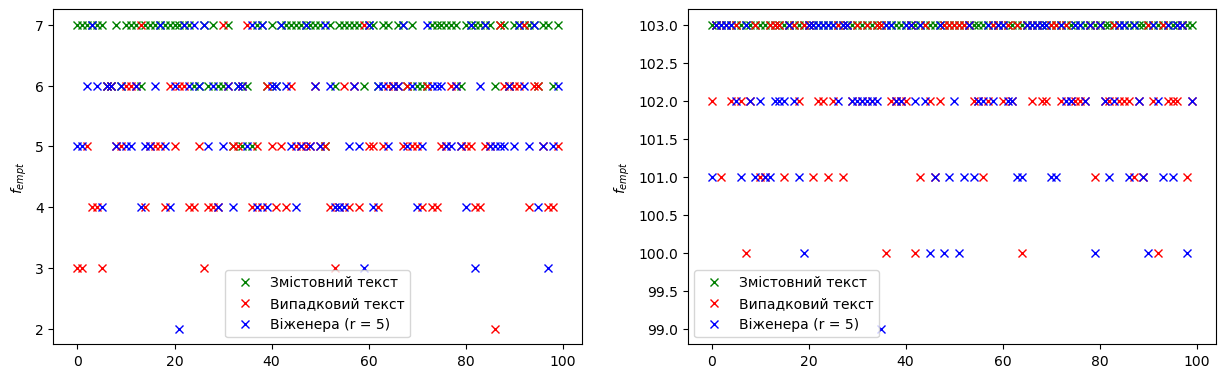

______________L = 100______________


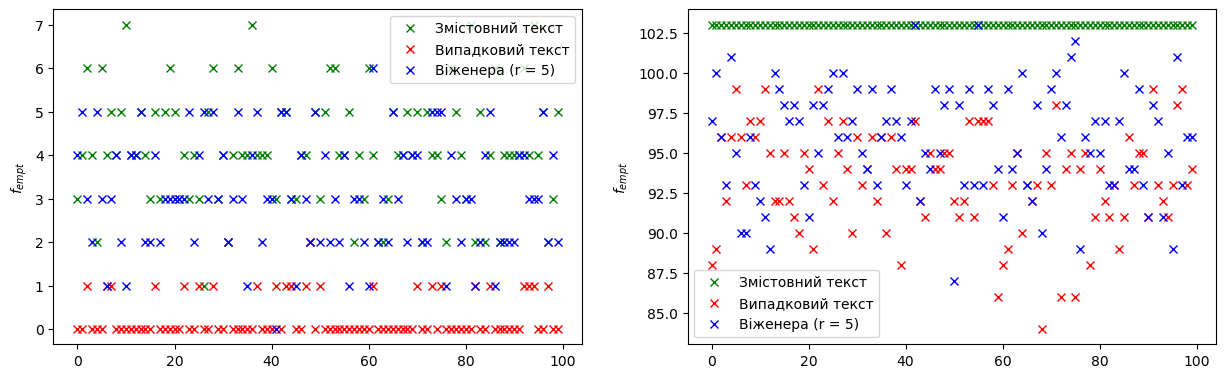

______________L = 1000______________


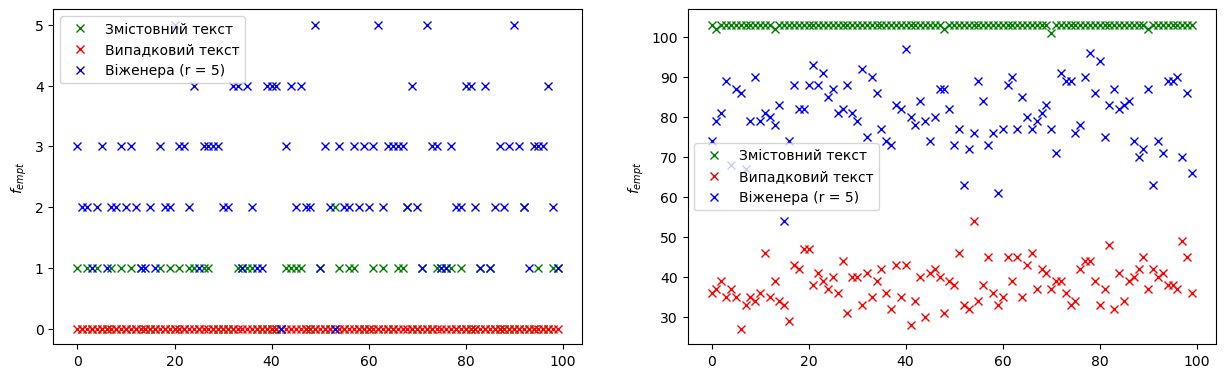

______________L = 10000______________


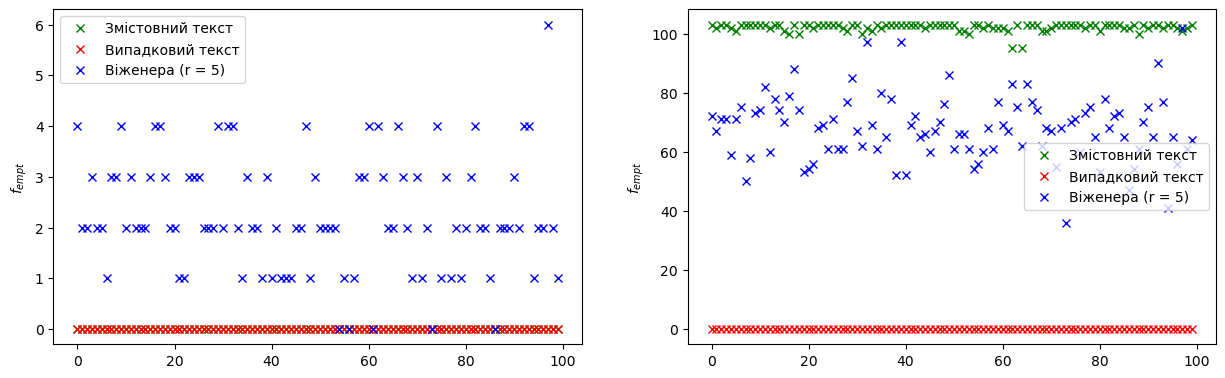

In [153]:
N = 100
i = 1
for L in (10, 100, 1000, 10000):
    print(f'______________L = {L}______________')
    texts = gen_texts()
    l = 1
    plt.subplots(figsize = (15,20))
    plt.subplot(4,2, i)
    plt.plot(range(N), [[count_enters(t, i) for i in Bprhs[0]].count(0) for t in texts], 'bx', color = 'green', 
                         label = 'Змістовний текст')
    plt.plot(range(N), [[count_enters(''.join(uniform_text()), i) for i in Bprhs[0]].count(0)  for n in range(N)], 'bx', 
                         color = 'red', label = 'Випадковий текст')
    plt.plot(range(N), [[count_enters(Vigenere(t), i) for i in Bprhs[0]].count(0) for t in texts],'bx', color = 'blue', 
                         label = f'Віженера (r = {len(key)})')
    plt.ylabel("$f_{empt}$")
    plt.legend()
    plt.subplot(4,2, i + 1)
    l = 2
    plt.plot(range(N), [[count_enters(t, i) for i in Bprhs[1]].count(0) for t in texts], 'bx', color = 'green',
                         label = 'Змістовний текст')
    plt.plot(range(N), [[count_enters(''.join(uniform_text()), i) for i in Bprhs[1]].count(0) for t in range(N)], 'bx', 
                         color = 'red',  label = 'Випадковий текст')
    plt.plot(range(N), [[count_enters(Vigenere(t), i) for i in Bprhs[1]].count(0) for t in texts], 'bx', color = 'blue', 
                         label = f'Віженера (r = {len(key)})')
    plt.ylabel("$f_{empt}$")
    plt.legend()
    plt.show()
    i += 2